Dataset is a sample marketing campaign conversion dataset from kaggle https://www.kaggle.com/datasets/davinwijaya/customer-retention, which gives us basic information on the customer and whether they converted or not from the campaign.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data.csv',error_bad_lines=False)

<ipython-input-89-32f64d7001c1>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data.csv',error_bad_lines=False)


**What does our data look like?**

In [ ]:
df.head(3)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0


We have 5 columns with buying behaviour of customers, we have only one column on demographic data of the customers. This dataset is limited in how much it can tell us about our customer profile but gives us some information on buying patterns.

**Renaming columns so that the data reads better**

In [ ]:
df = df.rename(columns={'recency': 'Mons last purchase', 'history': 'total purchase val yet'})
df.head(1)

,Mons last purchase,total purchase val yet,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0


In [ ]:
df.describe()

,Mons last purchase,total purchase val yet,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000



*   Data contains 63,998 records 

# **Data Exploration/Prep**

### **How many unique entries in each columns?**

In [ ]:
df.nunique()

Mons last purchase           12
total purchase val yet    34833
used_discount                 2
used_bogo                     2
zip_code                      3
is_referral                   2
channel                       3
offer                         3
conversion                    2
dtype: int64

# **Are there any NA values?**

In [ ]:
df.isna().sum()

Mons last purchase        0
total purchase val yet    0
used_discount             0
used_bogo                 0
zip_code                  0
is_referral               0
channel                   0
offer                     0
conversion                0
dtype: int64

No NA values



**Checking number of zero entries**

In [ ]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count > 0:
      print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  used_discount  is :  28734
Count of zeros in column  used_bogo  is :  28818
Count of zeros in column  is_referral  is :  31856
Count of zeros in column  conversion  is :  54606


We can expect a zero in these columns as these columns are categorical. Hence, there is no need to clean these columns further.

# **Visualising trends**

**How is the months since last purchase column distributed?**

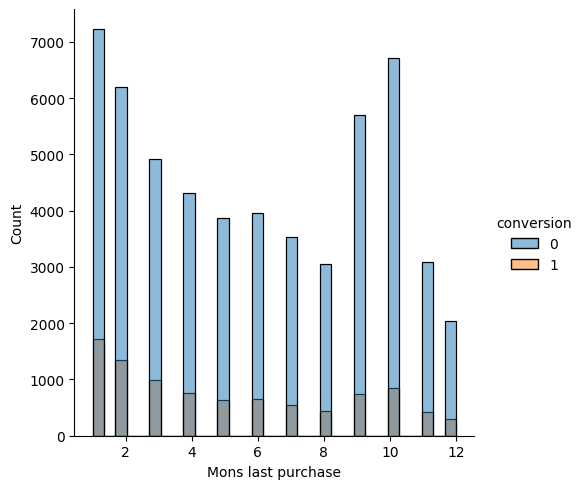

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.displot(data=df, x= df["Mons last purchase"], hue = 'conversion')

Text(0.5, 1.0, 'Recent purchase wise distribution')

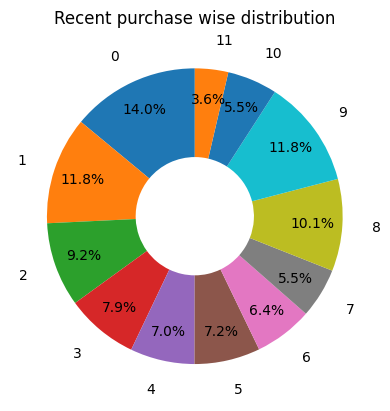

In [ ]:
count = pd.DataFrame(df.groupby('Mons last purchase',as_index = False).agg({"Mons last purchase":pd.Series.count}))
plt.pie(count["Mons last purchase"], labels= count.index, autopct='%1.1f%%',startangle=90,pctdistance=0.8, labeldistance=1.2,wedgeprops=dict(width=0.6))
plt.title('Recent purchase wise distribution')


We see spikes on both ends, towards the recent and the non-recent end (9th and 10th month) for both converted and non-converted customers.

*   Approximately 25% of the records seem to fall in the one month or less bucket, which suggests that a fourth of the customers are recent.
*   Appriximately 22% of the customers seem to fall in the greater than 9 months bucket. Which means there are many customers who have not purchased goods for more than 9 months.
*   From the bar graph we can see that customers who have made recent purchases seem more likely to convert.



**How are the total purchase values of customers distributed?**

<Axes: xlabel='total purchase val yet', ylabel='Density'>

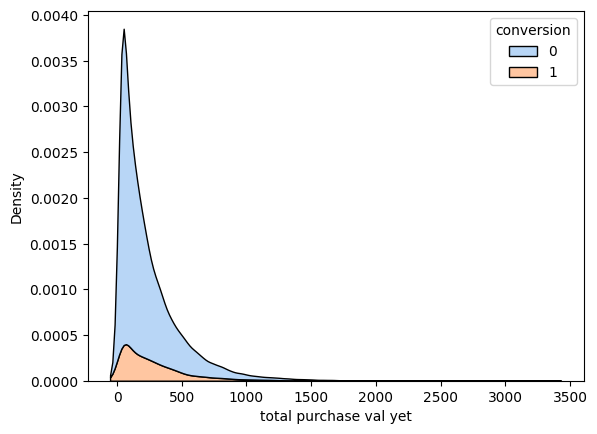

In [ ]:
import seaborn as sns

sns.kdeplot(data=df, x=df["total purchase val yet"],hue = df['conversion'], multiple="stack",palette = "pastel")

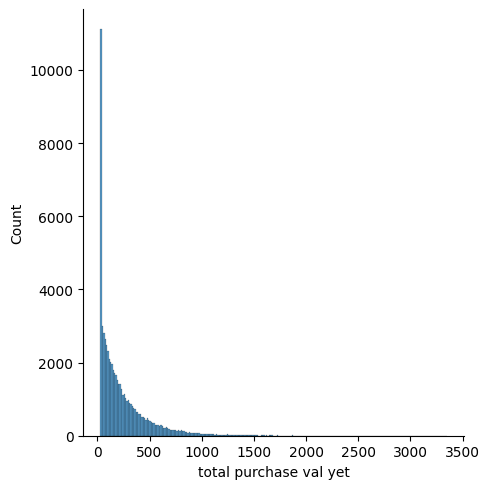

In [ ]:
sns.displot(data=df, x= df["total purchase val yet"])

In [ ]:
df["total purchase val yet"].describe()

count    64000.000000
mean       242.085656
std        256.158608
min         29.990000
25%         64.660000
50%        158.110000
75%        325.657500
max       3345.930000
Name: total purchase val yet, dtype: float64

25% of the purchases are less than 65 dollars, this is skewing our dataset. Maybe some information on the time of purchase or nature of purchase can tell us why this is. Perhaps these represent new customers who have made recent purchases?

**How does the distribution of our purchase values look if we log transform it?**

<Axes: xlabel='Log purchase values', ylabel='Density'>

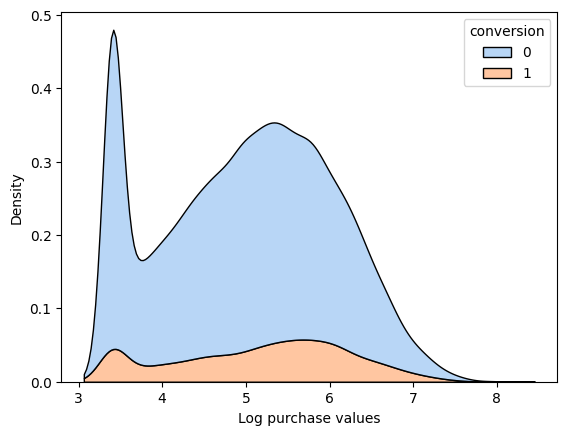

In [ ]:
df['Log purchase values'] = np.log(df["total purchase val yet"])
sns.kdeplot(data=df, x=df['Log purchase values'],hue = df['conversion'], multiple="stack",palette = "pastel")

<Axes: xlabel='Log purchase values', ylabel='Density'>

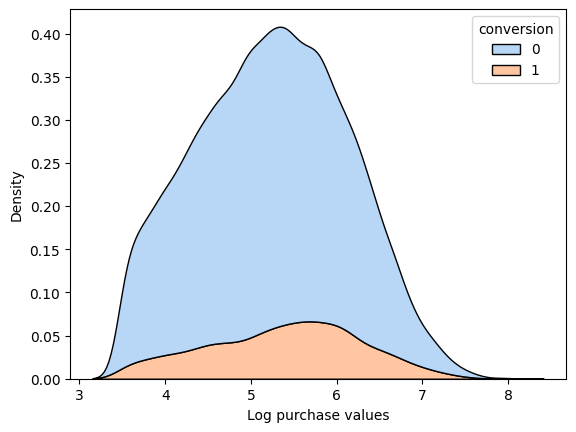

In [ ]:
df['Log purchase values'] = np.log(df["total purchase val yet"])
sns.kdeplot(data=df[df['Log purchase values'] > 3.45], x=df[df['Log purchase values'] > 3.45]['Log purchase values'],hue = df['conversion'], multiple="stack",palette = "pastel")

Log transformation has not improved the distribution, there is a small spike in log purchase values around the value of 3.45, It seems dropping values of Log purchase values < 3.45, improves the distribution of the data. However, we will not drop the values as we do not know if purchase values are generally expected to be normally distributed.

# **Visualizing trends: How do converted customers differ from non-converted customers?**

**Where do our customers come from?**

Text(0.5, 1.0, 'Converted customer background breakup')

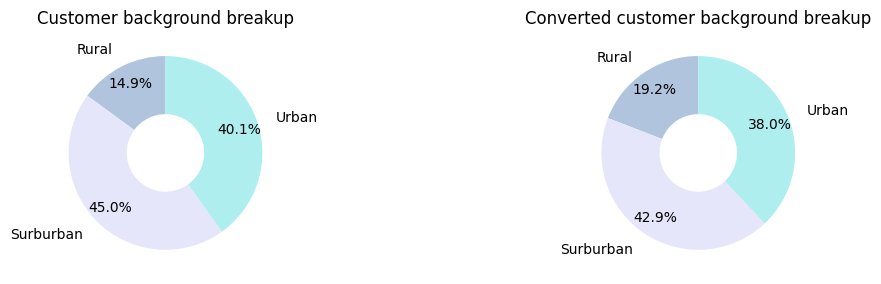

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
fig.subplots_adjust(hspace=0.2,wspace = 1.2)

colors = ['lightsteelblue','lavender','paleturquoise']
count = pd.DataFrame(df.groupby('zip_code').agg({'zip_code':pd.Series.count}))
ax1.pie(count['zip_code'], labels= count.index, autopct='%1.1f%%',startangle=90,
        pctdistance=0.8, labeldistance=1.2,wedgeprops=dict(width=0.6),colors = colors)
ax1.set_title('Customer background breakup')


count = pd.DataFrame(df[df['conversion'] == 1].groupby('zip_code').agg({'zip_code':pd.Series.count}))
ax2.pie(count['zip_code'], labels= count.index, autopct='%1.1f%%',startangle=90,
        pctdistance=0.8, labeldistance=1.2,wedgeprops=dict(width=0.6),colors = colors)
ax2.set_title('Converted customer background breakup')


For both converted and non converted customers, majority of the customers seem to come from suburban areas. However, the share of rural customers in the converted group is  slightly more than the general group (increases from 15% to a little over 19%).

**What are their buying patterns like?**

In [ ]:
df.head(1)

,Mons last purchase,total purchase val yet,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,Log purchase values
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,4.958921


Text(0.5, 1.0, 'Converted referral usage')

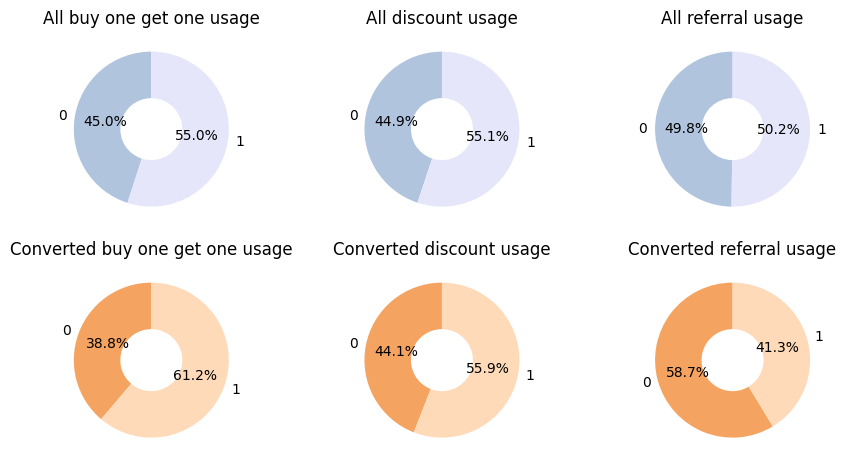

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols = 3,nrows = 2,figsize=(10,6))
fig.subplots_adjust(hspace=0,wspace = 0.5)

colors = ['lightsteelblue','lavender']

seg = pd.DataFrame(df.groupby('used_bogo').agg({'used_bogo':pd.Series.count}))

ax1.pie(seg.used_bogo, labels= seg.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax1.set_title('All buy one get one usage')
 
seg2 = pd.DataFrame(df.groupby('used_discount').agg({'used_discount':pd.Series.count}))
ax2.pie(seg2.used_discount, labels= seg2.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax2.set_title('All discount usage')

seg3 = pd.DataFrame(df.groupby('is_referral').agg({'is_referral':pd.Series.count}))
ax3.pie(seg3.is_referral, labels= seg3.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax3.set_title('All referral usage')

colors = ['sandybrown','peachpuff']

seg4 = pd.DataFrame(df[df['conversion'] == 1].groupby('used_bogo').agg({'used_bogo':pd.Series.count}))

ax4.pie(seg4.used_bogo, labels= seg.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax4.set_title('Converted buy one get one usage')
 
seg5 = pd.DataFrame(df[df['conversion'] == 1].groupby('used_discount').agg({'used_discount':pd.Series.count}))
ax5.pie(seg5.used_discount, labels= seg2.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax5.set_title('Converted discount usage')

seg6 = pd.DataFrame(df[df['conversion'] == 1].groupby('is_referral').agg({'is_referral':pd.Series.count}))
ax6.pie(seg6.is_referral, labels= seg3.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax6.set_title('Converted referral usage')



1.   Converted customers more likely to use a buy one get one offer and less likely to come through a referral.
2.   Overall all sales schemes seem to have a more or less equal split between converted and non-converted customers.



**What channels are customers using?**

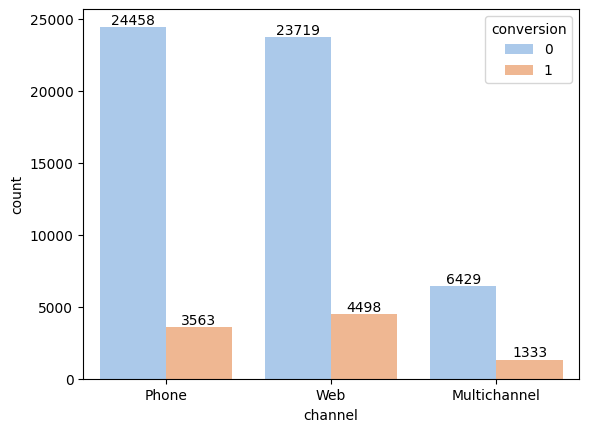

In [ ]:
import seaborn as sns
ax = sns.countplot(data = df,x = df['channel'],palette = 'pastel',hue = 'conversion')
for container in ax.containers:
    ax.bar_label(container)

Web and phone seem to be the two most popular channels for both converted and non-converted customers. However, unlike non-converted customers, in the converted group majority of the customers come from the web channel. 

**Distribution by channels**

Text(0.5, 1.0, 'converted channel distribution')

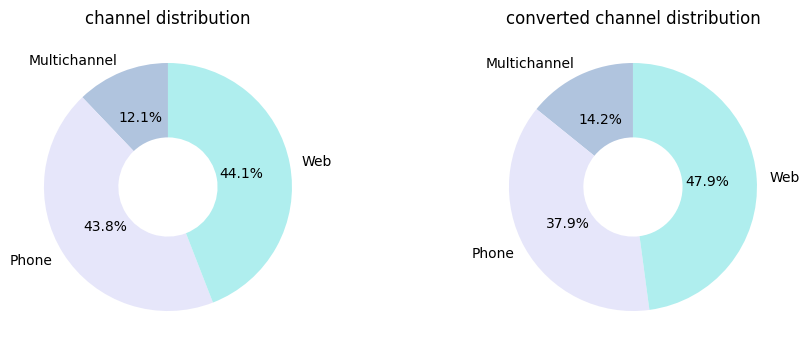

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,nrows = 1,figsize=(10,6))
fig.subplots_adjust(hspace=0,wspace = 0.5)

colors = ['lightsteelblue','lavender','paleturquoise']

seg3 = pd.DataFrame(df.groupby('channel').agg({'channel':pd.Series.count}))
ax1.pie(seg3.channel, labels= seg3.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax1.set_title('channel distribution')

seg4 = pd.DataFrame(df[df['conversion'] == 1].groupby('channel').agg({'channel':pd.Series.count}))
ax2.pie(seg4.channel, labels= seg4.index, autopct='%1.1f%%',startangle=90,colors = colors,wedgeprops=dict(width=0.6))
ax2.set_title('converted channel distribution')



*   The customers are almost evenly distributed between the phone and the web channel.
*   Very few customers (less than 15%) actually come through multiple channels.


**Saving the final dataset for analysis:**

In [ ]:
df.to_csv('/content/marketing_train3.csv')